[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berni-lehner/ml-templates/blob/main/notebooks/advanced_plots.ipynb)

## Prerequisites

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from imageio import imread

import numpy as np
from scipy.stats import norm
from sklearn.metrics import ConfusionMatrixDisplay

random_state=None

### Setting up general Figure properties
Everything that is shared between subplots can be setup globally in advance.

In [2]:
# general plot configuration
SMALL_SIZE = 10
MEDIUM_SIZE = 16
LARGE_SIZE = 20
HUGE_SIZE = 24

plt.rc('figure', figsize=(3, 3))        # default figure size
plt.rc('figure', titlesize=HUGE_SIZE)     # fontsize of the figure title
plt.rc('figure', titleweight='bold')      # weight of the figure title
plt.rc('font', size=MEDIUM_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)      # fontsize of the axes title
plt.rc('axes', titleweight='bold')        # weight of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

### Create some fake data

In [3]:
# confusion matrix
low = 0
high = 100
shape = (3,3)
mat = np.random.randint(low, high, shape)
mat_labels = (['A', 'B', 'C'])


# 1-dimensional data
n = 100
mu = 0
sigma = 1
x1 = norm.rvs(size=n, loc=mu, scale=sigma, random_state=random_state)
x2 = norm.rvs(size=n, loc=mu, scale=sigma, random_state=random_state)

# 2-dimensional data
x = np.vstack([x1, x2])
x_labels = (['x1', 'x2'])


# some image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ea/Test.gif'
try:
    image = imread(url)
except Exception:
    from PIL import Image
    import requests
    from io import BytesIO
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

- - - -

## 1. Plotting functions that take an axis as conditional parameter
Below are a few examples of how these functions can be implemented. 

In [4]:
def plot_X(X, ax=None, legend=None, title=None):
    '''
    Plots the values of the given vector (can also be multi-dimensional).
    '''
    try:
        n_rows, n_cols = X.shape
    except: 
        n_rows = 1
        n_cols = X.shape[0]
        
    if ax is None:
        ax = plt.gca()
    
    for row in range(n_rows):
        ax.plot(X[row])
        
    if legend:
        ax.legend(legend)
        
    if title:
        ax.set_title(title)

    ax.set_xlim([0, n_cols])
    
    # make top and right part of the frame invisible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

### Notice, that all of these functions also work stand-alone if you don't pass an axis to draw on.

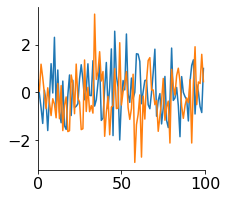

In [5]:
plot_X(x)